# 1. Hydra_V5.  (Rep Counting Simulation Metrics)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
plt.style.use('fivethirtyeight')

In [4]:
plt.style.use('ggplot')
df = pd.read_csv('hydra_v5.csv')
df

,Unnamed: 0,variation,release_group,exercise_id,n_sets,MARE,OBZ,OB1,EC,rep_error_bias,is_FA,n_total_reps,signal_score,MARE delta w/ supermodel_v5_hydra,n_sets delta w/ supermodel_v5_hydra,is_FA delta w/ supermodel_v5_hydra
0,0,alternating lunge jumps with both arms swinging,List A,613.0,17.00,10.43%,41.18%,82.35%,0.00,-0.29,96.19%,181.0,87.21%,1.66%,0.0,0.73%
1,1,alternating lunge jumps with runner arms,List A,612.0,15.00,23.13%,26.67%,40.00%,0.00,-3.33,97.22%,204.0,9.40%,-1.30%,0.0,-0.12%
2,2,bent over row kneeling alternating with restin...,MVP,620.0,6.00,12.40%,50.00%,50.00%,0.00,-1.00,96.14%,95.0,66.76%,0.42%,0.0,-0.49%
3,3,bent over row kneeling both arms,MVP,618.0,7.00,3.92%,57.14%,100.00%,1.00,-0.14,99.84%,86.0,88.38%,0.00%,0.0,0.00%
4,4,bent over row standing alternating with restin...,MVP,614.0,8.00,12.47%,37.50%,62.50%,0.00,-1.88,98.62%,108.0,59.71%,1.33%,0.0,-0.22%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,MVP,Average,NaN,NaN,11.86,5.45%,69.81%,89.48%,0.85,-0.18,94.20%,NaN,89.01%,0.06%,NaN,0.03%
263,NaN,Sum,182,NaN,2159.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.0,NaN
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,List A,Average,NaN,NaN,12.81,15.70%,49.20%,72.33%,0.47,-0.56,94.29%,NaN,71.53%,-0.12%,NaN,0.49%


In [5]:
df.columns

Index(['Unnamed: 0', 'variation', 'release_group', 'exercise_id', 'n_sets',
       'MARE', 'OBZ', 'OB1', 'EC', 'rep_error_bias', 'is_FA', 'n_total_reps',
       'signal_score', 'MARE delta w/ supermodel_v5_hydra',
       'n_sets delta w/ supermodel_v5_hydra',
       'is_FA delta w/ supermodel_v5_hydra'],
      dtype='object')

In [6]:
df.shape

(267, 16)

In [13]:
df = df.dropna()

In [14]:
df.isna().sum()

Unnamed: 0      0
variation       0
exercise_id     0
MARE            0
is_FA           0
signal_score    0
dtype: int64

In [16]:
df.shape

(256, 6)

In [17]:
df

,Unnamed: 0,variation,exercise_id,MARE,is_FA,signal_score
0,0,alternating lunge jumps with both arms swinging,613.0,10.43%,96.19%,87.21%
1,1,alternating lunge jumps with runner arms,612.0,23.13%,97.22%,9.40%
2,2,bent over row kneeling alternating with restin...,620.0,12.40%,96.14%,66.76%
3,3,bent over row kneeling both arms,618.0,3.92%,99.84%,88.38%
4,4,bent over row standing alternating with restin...,614.0,12.47%,98.62%,59.71%
...,...,...,...,...,...,...
251,251,zottman curl balancing alternating with restin...,1291.0,0.00%,94.98%,98.27%
252,252,zottman curl kneeling both arms,1279.0,1.68%,98.04%,96.20%
253,253,zottman curl standing alternating with resting...,1287.0,0.00%,96.33%,98.58%
254,254,zottman curl standing alternating with resting...,1281.0,18.13%,100.00%,98.36%


In [21]:
df1 = df.loc[(df['exercise_id'] == 616)
                              | (df['exercise_id'] == 1267)
                              | (df['exercise_id'] == 839)
                              | (df['exercise_id'] == 329)
                              | (df['exercise_id'] == 1212)
                              | (df['exercise_id'] == 675)
                              | (df['exercise_id'] == 1241)
                              | (df['exercise_id'] == 1250)
                              | (df['exercise_id'] == 695)
                              | (df['exercise_id'] == 856)
                              | (df['exercise_id'] == 890)
                              | (df['exercise_id'] == 1523)
                              | (df['exercise_id'] == 1719)
                              | (df['exercise_id'] == 750)
                              | (df['exercise_id'] == 937)
                              | (df['exercise_id'] == 1482)]

In [22]:
df1

,Unnamed: 0,variation,exercise_id,MARE,is_FA,signal_score
6,6,bent over row standing both arms,616.0,0.00%,99.45%,95.42%
26,26,bodyweight squat hands at shoulders,329.0,1.96%,96.00%,94.15%
56,56,deadlift romanian,675.0,0.00%,86.29%,98.85%
102,102,lateral lunge arms by side dumbbell,750.0,9.14%,84.90%,97.93%
121,121,neutral grip chest press hook lying both arms,1212.0,7.60%,93.40%,86.69%
139,139,overhead press standing both arms,839.0,8.01%,88.42%,91.12%
153,153,push press standing both arms,1241.0,69.00%,28.01%,56.26%
156,156,pushup on toes,856.0,9.60%,82.43%,91.91%
160,160,reverse fly standing bent over both arms,1250.0,1.94%,99.21%,93.11%
164,164,reverse lunge arms by side dumbbell,890.0,2.46%,96.61%,89.70%


In [25]:
df1.dtypes

Unnamed: 0       object
variation        object
exercise_id     float64
MARE             object
is_FA            object
signal_score     object
dtype: object

In [46]:
data = {
   # 'variation': ['bent over row standing both arms', 'bodyweight squat hands at shoulders', 'deadlift romanian', 'lateral lunge arms by side dumbbell', 'neutral grip chest press hook lying both arms', 'overhead press standing both arms', 'push press standing both arms', 'pushup on toes', 'reverse fly standing bent over both arms', 'reverse lunge arms by side dumbbell', 'split squat arms by side', 'tricep kickback standing both arms', 'wide grip bent over row both arms', 'wide grip chest press hook lying both arms'],
    'id': [616.0, 329.0, 675.0, 750.0, 1212.0, 839.0, 1241.0, 856.0, 1250.0, 890.0, 937.0, 1267.0, 1719.0, 1523.0 ],
           'MARE': [0.00, 1.96, 0.00, 9.14, 7.60, 8.01, 69.00, 9.60, 1.94, 2.46, 11.01, 4.09, 0.00, 2.08],
   'is_FA' : [99.45, 96.00, 86.29, 84.90, 93.40, 88.42, 28.01, 82.43, 99.21, 96.61, 98.43, 99.66, 100.00, 97.99],
    'signal_score': [95.42, 94.15, 98.85, 97.93, 86.69, 91.12, 56.26, 91.91, 93.11, 89.70, 78.17, 80.25, 96.89, 86.72],
}

df = pd.DataFrame(data)

In [47]:
df.dtypes

id              float64
MARE            float64
is_FA           float64
signal_score    float64
dtype: object

# Barplot

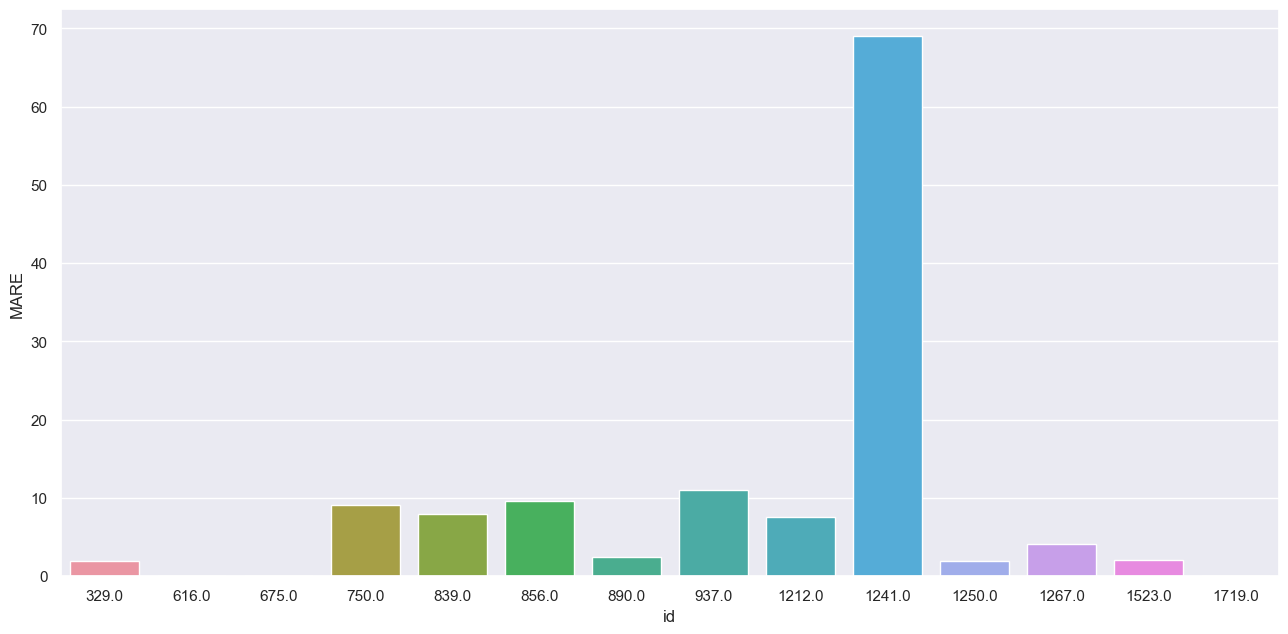

In [48]:
plt.figure(figsize=(14, 7))
sns.barplot(x = 'id',y = 'MARE', data = df )
plt.show()

# Histogram

<Axes: xlabel='id', ylabel='MARE'>

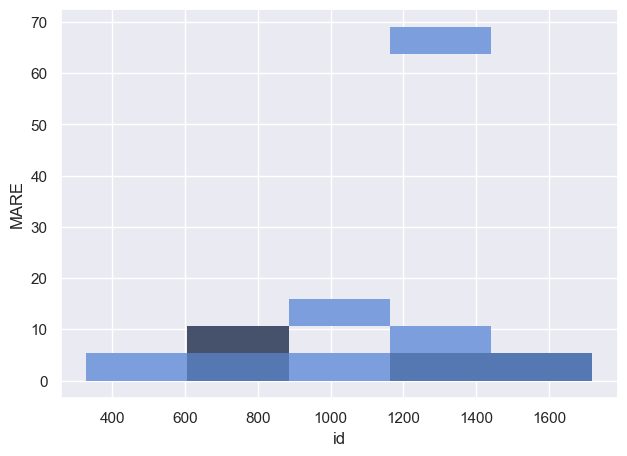

In [49]:
sns.histplot(data = df, x="id", y="MARE", multiple="stack")

# Joint plot

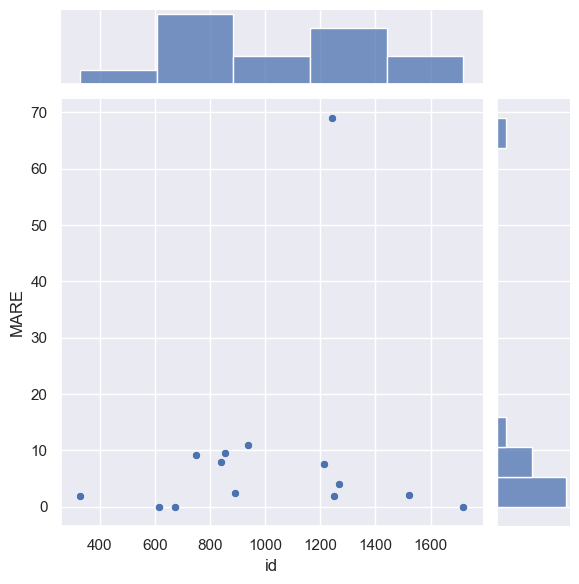

In [50]:
sns.jointplot(data = df, x="id", y="MARE")

# Scatter plot

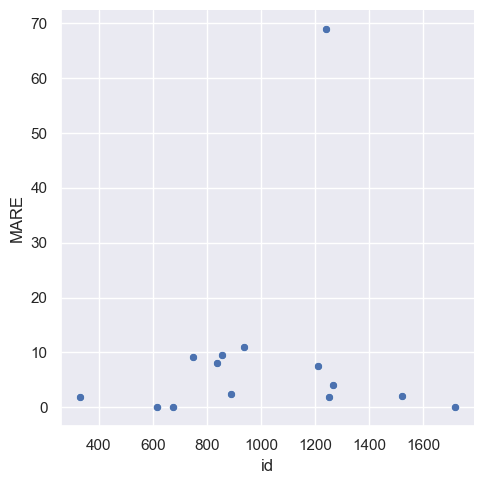

In [51]:
# Apply the default theme
sns.set_theme()
# Create a visualization
sns.relplot(
    data = df,
    x="id", y="MARE")
plt.show()

# 2. hydra_v5_FAstridefix

In [52]:
plt.style.use('ggplot')
df = pd.read_csv('hydra_v5_FAstridefix.csv')
df

,Unnamed: 0,variation,release_group,exercise_id,n_sets,MARE,OBZ,OB1,EC,rep_error_bias,is_FA,n_total_reps,signal_score,MARE delta w/ hydra_v5,n_sets delta w/ hydra_v5,is_FA delta w/ hydra_v5,signal_score delta w/ hydra_v5_variation
0,0,alternating lunge jumps with both arms swinging,List A,613.0,17.00,9.84%,47.06%,82.35%,1.00,-0.35,98.29%,181.0,87.20%,-0.59%,0.0,2.09%,0.00%
1,1,alternating lunge jumps with runner arms,List A,612.0,15.00,23.13%,26.67%,40.00%,0.00,-3.33,97.36%,204.0,9.32%,0.00%,0.0,0.14%,-0.08%
2,2,bent over row kneeling alternating with restin...,MVP,620.0,6.00,13.10%,50.00%,50.00%,0.00,-0.83,97.27%,95.0,66.61%,0.69%,0.0,1.13%,-0.14%
3,3,bent over row kneeling both arms,MVP,618.0,7.00,3.92%,57.14%,100.00%,1.00,-0.14,99.92%,86.0,88.38%,0.00%,0.0,0.08%,0.00%
4,4,bent over row standing alternating with restin...,MVP,614.0,8.00,9.69%,50.00%,75.00%,1.00,-1.63,99.62%,108.0,57.70%,-2.78%,0.0,1.00%,-2.02%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,MVP,Average,NaN,NaN,11.90,5.04%,70.25%,90.01%,0.86,-0.10,96.16%,136.3,88.42%,-0.41%,NaN,1.95%,-0.59%
263,NaN,Sum,182,NaN,2165.00,NaN,NaN,NaN,NaN,NaN,NaN,24807.0,NaN,NaN,6.0,NaN,NaN
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,List A,Average,NaN,NaN,12.82,14.76%,50.63%,72.67%,0.47,-0.42,96.14%,147.2,70.84%,-0.94%,NaN,1.85%,-0.68%


In [53]:
df1 = df.loc[(df['exercise_id'] == 616)
                              | (df['exercise_id'] == 1267)
                              | (df['exercise_id'] == 839)
                              | (df['exercise_id'] == 329)
                              | (df['exercise_id'] == 1212)
                              | (df['exercise_id'] == 675)
                              | (df['exercise_id'] == 1241)
                              | (df['exercise_id'] == 1250)
                              | (df['exercise_id'] == 695)
                              | (df['exercise_id'] == 856)
                              | (df['exercise_id'] == 890)
                              | (df['exercise_id'] == 1523)
                              | (df['exercise_id'] == 1719)
                              | (df['exercise_id'] == 750)
                              | (df['exercise_id'] == 937)
                              | (df['exercise_id'] == 1482)]

In [54]:
df1

,Unnamed: 0,variation,release_group,exercise_id,n_sets,MARE,OBZ,OB1,EC,rep_error_bias,is_FA,n_total_reps,signal_score,MARE delta w/ hydra_v5,n_sets delta w/ hydra_v5,is_FA delta w/ hydra_v5,signal_score delta w/ hydra_v5_variation
6,6,bent over row standing both arms,MVP,616.0,9.0,0.00%,100.00%,100.00%,1.0,0.00,99.81%,90.0,95.37%,0.00%,0.0,0.35%,-0.04%
26,26,bodyweight squat hands at shoulders,MVP,329.0,19.0,1.96%,89.47%,94.74%,1.0,-0.21,96.29%,201.0,94.12%,0.00%,0.0,0.29%,-0.03%
56,56,deadlift romanian,MVP,675.0,10.0,1.68%,80.00%,100.00%,1.0,0.20,90.63%,98.0,98.80%,1.68%,0.0,4.33%,-0.04%
102,102,lateral lunge arms by side dumbbell,MVP,750.0,11.0,7.47%,63.64%,81.82%,1.0,-0.55,88.46%,104.0,97.86%,-1.67%,0.0,3.56%,-0.08%
121,121,neutral grip chest press hook lying both arms,MVP,1212.0,19.0,7.60%,78.95%,84.21%,1.0,-0.47,96.45%,202.0,87.50%,0.00%,0.0,3.05%,0.80%
139,139,overhead press standing both arms,MVP,839.0,19.0,1.58%,89.47%,94.74%,1.0,-0.05,93.20%,179.0,91.12%,-6.43%,0.0,4.79%,0.00%
153,153,push press standing both arms,List A,1241.0,20.0,61.62%,10.00%,10.00%,0.0,-5.85,36.90%,185.0,70.44%,-7.38%,0.0,8.89%,14.18%
156,156,pushup on toes,MVP,856.0,13.0,9.86%,69.23%,84.62%,1.0,-0.77,87.62%,121.0,91.38%,0.26%,0.0,5.19%,-0.53%
160,160,reverse fly standing bent over both arms,MVP,1250.0,18.0,1.94%,83.33%,94.44%,1.0,-0.11,99.78%,194.0,93.10%,0.00%,0.0,0.57%,0.00%
164,164,reverse lunge arms by side dumbbell,MVP,890.0,13.0,2.46%,84.62%,92.31%,1.0,0.31,98.46%,144.0,87.67%,0.00%,0.0,1.85%,-2.03%


In [55]:
data = {
    'variation': ['bent over row standing both arms', 'bodyweight squat hands at shoulders', 'deadlift romanian', 'lateral lunge arms by side dumbbell', 'neutral grip chest press hook lying both arms', 'overhead press standing both arms', 'push press standing both arms', 'pushup on toes', 'reverse fly standing bent over both arms', 'reverse lunge arms by side dumbbell', 'split squat arms by side', 'tricep kickback standing both arms', 'wide grip bent over row both arms', 'wide grip chest press hook lying both arms'],
    'exercise_id': [616.0, 329.0, 675.0, 750.0, 1212.0, 839.0, 1241.0, 856.0, 1250.0, 890.0, 937.0, 1267.0, 1719.0, 1523.0 ],
           'MARE': [0.00, 1.96, 1.68, 7.47, 7.60, 1.58, 61.62, 9.86, 1.94, 2.46, 11.01, 4.09, 0.00, 2.08],
   'is_FA' : [99.81, 96.29, 90.63, 88.46, 96.45, 93.20, 36.90, 87.62, 99.78, 98.46, 99.38, 99.83, 100.00, 98.89],
    'signal_score': [95.37, 94.12, 98.80, 97.86, 87.50, 91.12, 70.44, 91.38, 93.10, 87.67, 77.59, 80.24, 96.83, 86.66],
}

df = pd.DataFrame(data)

# Barplot

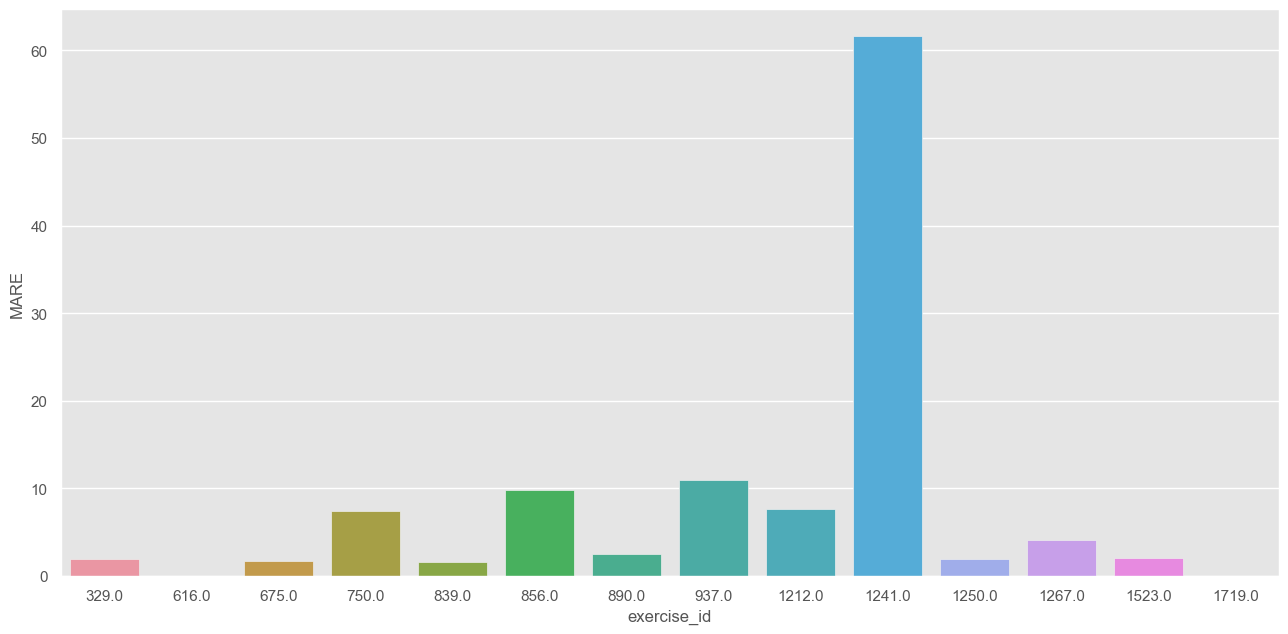

In [57]:
plt.figure(figsize=(14, 7))
sns.barplot(x = 'exercise_id',y = 'MARE', data = df )
plt.show()

# Histogram

<Axes: xlabel='exercise_id', ylabel='MARE'>

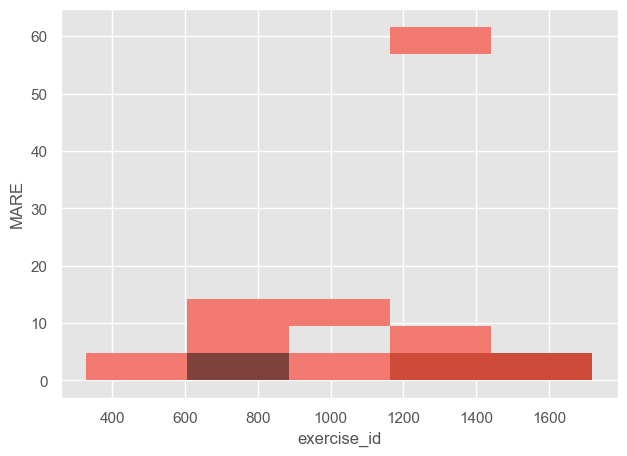

In [59]:
sns.histplot(data = df, x="exercise_id", y="MARE", multiple="stack")

# Joint plot

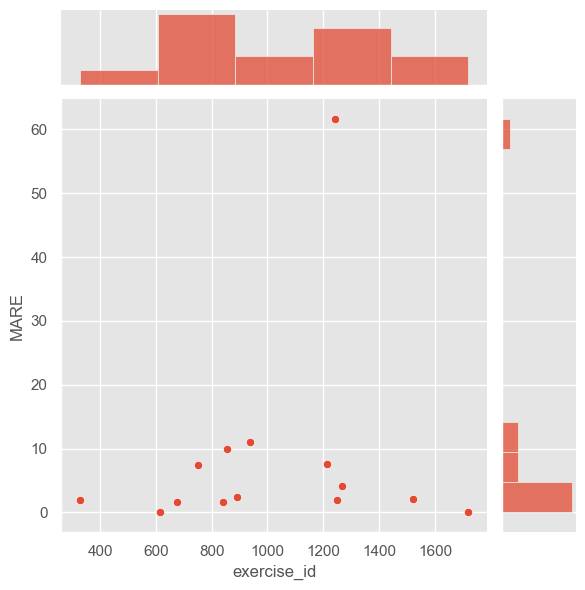

In [60]:
sns.jointplot(data = df, x="exercise_id", y="MARE")

# Scatter plot

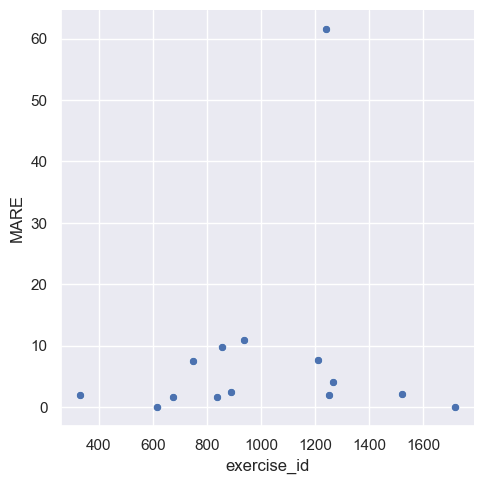

In [61]:
# Apply the default theme
sns.set_theme()
# Create a visualization
sns.relplot(
    data = df,
    x="exercise_id", y="MARE")
plt.show()

# 3. hydra_v6_FAstridefix

In [63]:
df = pd.read_csv('hydra_v6_FAstridefix.csv')
df

,Unnamed: 0,variation,release_group,exercise_id,n_sets,MARE,OBZ,OB1,EC,rep_error_bias,is_FA,n_total_reps,signal_score,MARE delta w/ hydra_v5_fastridefix,n_sets delta w/ hydra_v5_fastridefix,is_FA delta w/ hydra_v5_fastridefix,signal_score delta w/ hydra_v5_fastridefix
0,0,alternating lunge jumps with both arms swinging,List A,613.0,17.00,7.03%,58.82%,82.35%,1.00,-0.06,98.15%,181.0,90.78%,-2.81%,0.0,-0.14%,3.57%
1,1,alternating lunge jumps with runner arms,List A,612.0,15.00,12.20%,33.33%,80.00%,0.00,0.07,97.38%,204.0,92.17%,-10.93%,0.0,0.02%,82.85%
2,2,bent over row kneeling alternating with restin...,MVP,620.0,6.00,17.78%,16.67%,50.00%,0.00,-1.50,97.51%,95.0,65.24%,4.68%,0.0,0.24%,-1.37%
3,3,bent over row kneeling both arms,MVP,618.0,7.00,2.29%,71.43%,100.00%,1.00,0.00,99.92%,86.0,93.27%,-1.63%,0.0,0.00%,4.89%
4,4,bent over row standing alternating with restin...,MVP,614.0,8.00,9.00%,50.00%,75.00%,1.00,-1.13,99.46%,108.0,67.12%,-0.69%,0.0,-0.16%,9.42%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,MVP,Average,NaN,NaN,11.87,5.04%,71.13%,90.33%,0.86,-0.14,96.16%,NaN,87.67%,0.00%,NaN,0.00%,-0.75%
263,NaN,Sum,182,NaN,2160.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,NaN,NaN
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,List A,Average,NaN,NaN,12.77,15.65%,52.24%,73.41%,0.42,0.07,96.09%,NaN,74.10%,0.89%,NaN,-0.05%,3.25%


In [64]:
df1 = df.loc[(df['exercise_id'] == 616)
                              | (df['exercise_id'] == 1267)
                              | (df['exercise_id'] == 839)
                              | (df['exercise_id'] == 329)
                              | (df['exercise_id'] == 1212)
                              | (df['exercise_id'] == 675)
                              | (df['exercise_id'] == 1241)
                              | (df['exercise_id'] == 1250)
                              | (df['exercise_id'] == 695)
                              | (df['exercise_id'] == 856)
                              | (df['exercise_id'] == 890)
                              | (df['exercise_id'] == 1523)
                              | (df['exercise_id'] == 1719)
                              | (df['exercise_id'] == 750)
                              | (df['exercise_id'] == 937)
                              | (df['exercise_id'] == 1482)]

In [65]:
df1

,Unnamed: 0,variation,release_group,exercise_id,n_sets,MARE,OBZ,OB1,EC,rep_error_bias,is_FA,n_total_reps,signal_score,MARE delta w/ hydra_v5_fastridefix,n_sets delta w/ hydra_v5_fastridefix,is_FA delta w/ hydra_v5_fastridefix,signal_score delta w/ hydra_v5_fastridefix
6,6,bent over row standing both arms,MVP,616.0,9.0,1.11%,88.89%,100.00%,1.0,-0.11,99.71%,90.0,90.90%,1.11%,0.0,-0.09%,-4.47%
26,26,bodyweight squat hands at shoulders,MVP,329.0,19.0,2.45%,78.95%,94.74%,1.0,-0.05,96.26%,201.0,96.54%,0.49%,0.0,-0.04%,2.43%
56,56,deadlift romanian,MVP,675.0,10.0,1.68%,80.00%,100.00%,1.0,0.20,90.19%,98.0,98.61%,0.00%,0.0,-0.43%,-0.19%
102,102,lateral lunge arms by side dumbbell,MVP,750.0,11.0,7.47%,63.64%,81.82%,1.0,-0.55,88.81%,104.0,97.31%,0.00%,0.0,0.35%,-0.54%
121,121,neutral grip chest press hook lying both arms,MVP,1212.0,19.0,10.07%,78.95%,78.95%,0.0,-0.37,97.95%,202.0,85.46%,2.47%,0.0,1.51%,-2.04%
139,139,overhead press standing both arms,MVP,839.0,19.0,1.58%,89.47%,94.74%,1.0,-0.16,93.68%,179.0,93.22%,0.00%,0.0,0.48%,2.10%
153,153,push press standing both arms,List A,1241.0,20.0,60.73%,10.00%,10.00%,0.0,-5.80,36.04%,185.0,73.48%,-0.88%,0.0,-0.86%,3.04%
156,156,pushup on toes,MVP,856.0,13.0,10.74%,76.92%,76.92%,0.0,-0.92,87.46%,121.0,85.91%,0.88%,0.0,-0.16%,-5.47%
160,160,reverse fly standing bent over both arms,MVP,1250.0,17.0,2.11%,82.35%,94.12%,1.0,0.00,99.65%,187.0,92.50%,0.17%,-1.0,-0.13%,-0.61%
164,164,reverse lunge arms by side dumbbell,MVP,890.0,13.0,2.40%,84.62%,92.31%,1.0,0.38,98.93%,144.0,87.56%,-0.05%,0.0,0.47%,-0.11%


In [66]:
data = {
    'variation': ['bent over row standing both arms', 'bodyweight squat hands at shoulders', 'deadlift romanian', 'lateral lunge arms by side dumbbell', 'neutral grip chest press hook lying both arms', 'overhead press standing both arms', 'push press standing both arms', 'pushup on toes', 'reverse fly standing bent over both arms', 'reverse lunge arms by side dumbbell', 'split squat arms by side', 'tricep kickback standing both arms', 'wide grip bent over row both arms', 'wide grip chest press hook lying both arms'],
    'exercise_id': [616.0, 329.0, 675.0, 750.0, 1212.0, 839.0, 1241.0, 856.0, 1250.0, 890.0, 937.0, 1267.0, 1719.0, 1523.0 ],
           'MARE': [1.11, 2.45, 1.68, 7.47, 10.07, 1.58, 60.73, 10.74, 2.11, 2.40, 3.03, 5.23, 0.00, 2.08],
   'is_FA' : [99.71, 96.26, 90.19, 88.81, 97.95, 93.68, 36.04, 87.46, 99.65, 98.93, 99.40, 99.54, 100.00, 98.89],
    'signal_score': [90.90, 96.54, 98.61, 97.31, 85.46, 93.22, 73.48, 85.91, 92.50, 87.56, 79.74, 72.22, 96.55, 87.84],
}

df = pd.DataFrame(data)

In [67]:
df

,variation,exercise_id,MARE,is_FA,signal_score
0,bent over row standing both arms,616.0,1.11,99.71,90.90
1,bodyweight squat hands at shoulders,329.0,2.45,96.26,96.54
2,deadlift romanian,675.0,1.68,90.19,98.61
3,lateral lunge arms by side dumbbell,750.0,7.47,88.81,97.31
4,neutral grip chest press hook lying both arms,1212.0,10.07,97.95,85.46
5,overhead press standing both arms,839.0,1.58,93.68,93.22
6,push press standing both arms,1241.0,60.73,36.04,73.48
7,pushup on toes,856.0,10.74,87.46,85.91
8,reverse fly standing bent over both arms,1250.0,2.11,99.65,92.50
9,reverse lunge arms by side dumbbell,890.0,2.40,98.93,87.56


# Barplot - hydra_v6_FAstridefix

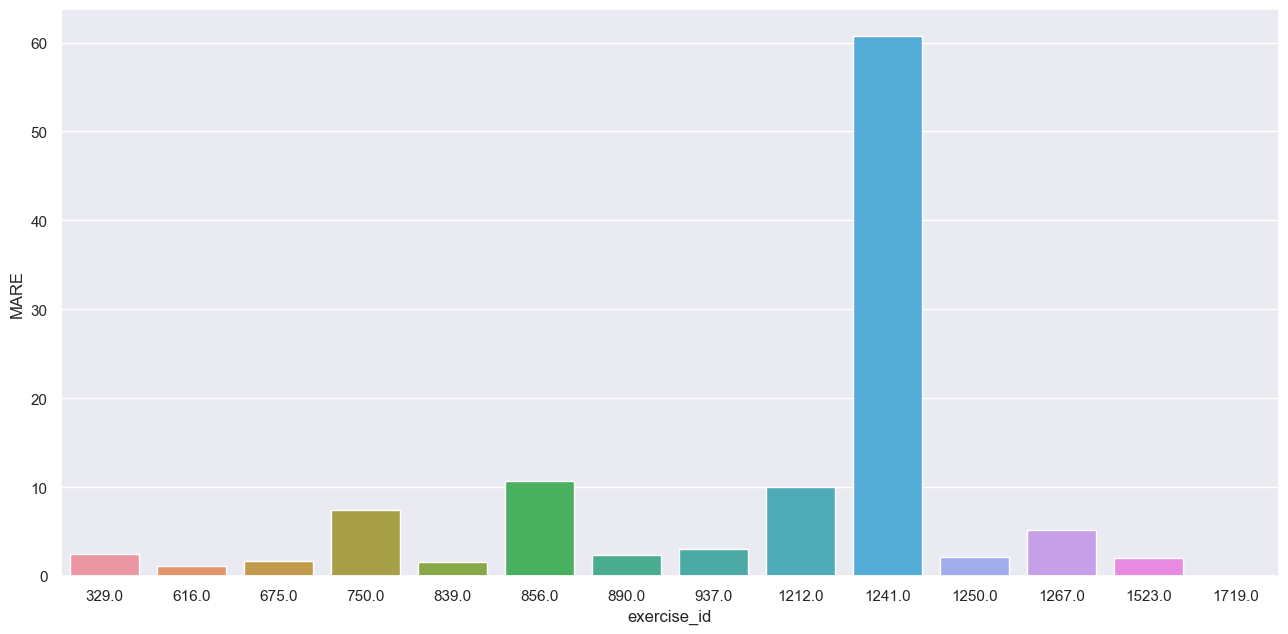

In [68]:
plt.figure(figsize=(14, 7))
sns.barplot(x = 'exercise_id',y = 'MARE', data = df )
plt.show()

# Histogram - hydra_v6_FAstridefix

<Axes: xlabel='exercise_id', ylabel='MARE'>

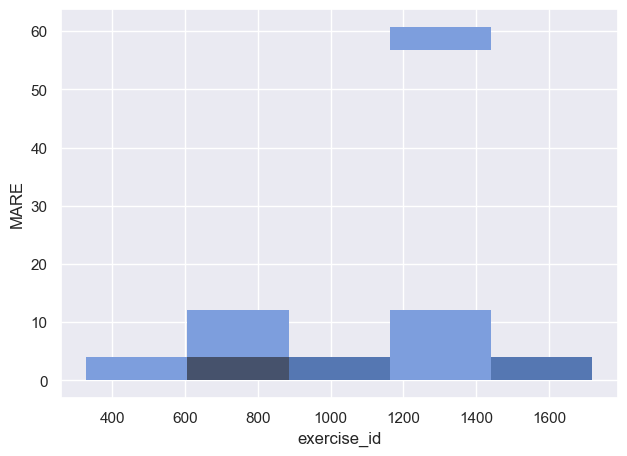

In [69]:
sns.histplot(data = df, x="exercise_id", y="MARE", multiple="stack")

# Joint plot - hydra_v6_FAstridefix

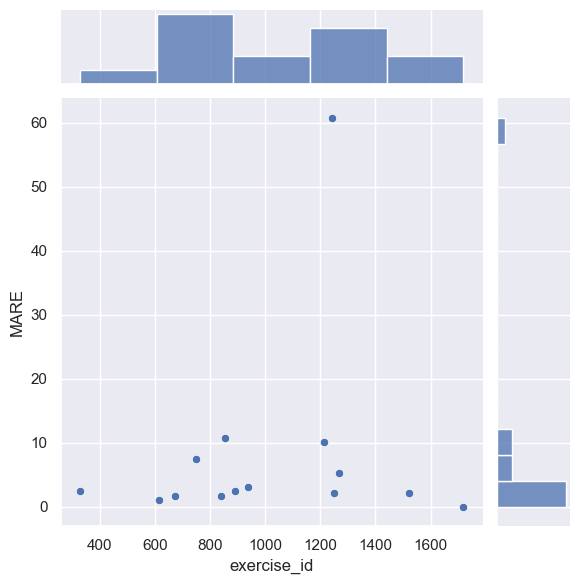

In [70]:
sns.jointplot(data = df, x="exercise_id", y="MARE")

# Scatter plot - hydra_v6_FAstridefix

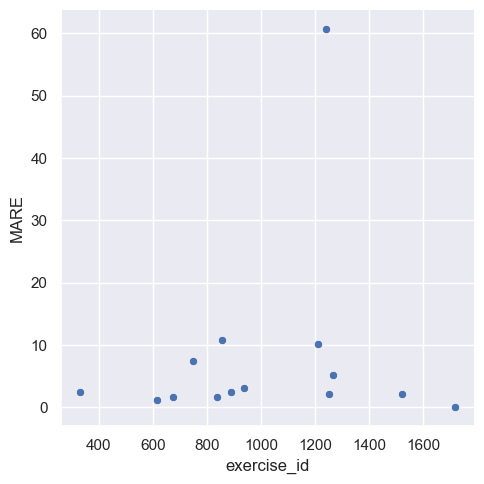

In [71]:
# Apply the default theme
sns.set_theme()
# Create a visualization
sns.relplot(
    data = df,
    x="exercise_id", y="MARE")
plt.show()

# 4. hydra_v6c_python_sim_incomplete

In [72]:
df = pd.read_csv('hydra_v6c_python_sim_incomplete.csv')
df

,Unnamed: 0,variation,release_group,exercise_id,n_sets,MARE,OBZ,OB1,EC,rep_error_bias,is_FA,n_total_reps,signal_score,n_sets delta w/ hydra_v6b_python,signal_score delta w/ hydra_v6b_python,n_sets delta w/ hydra_v6_fastridefix,signal_score delta w/ hydra_v6_fastridefix
0,0,alternating lunge jumps with both arms swinging,List A,613,16,60.06%,31.25%,37.50%,0,2.625000,93.59%,136,93.22%,0.0,9.77%,-1.0,6.01%
1,1,alternating lunge jumps with runner arms,List A,612,18,76.98%,27.78%,27.78%,0,5.166667,99.04%,164,89.13%,2.0,4.59%,3.0,79.81%
2,2,arnold press kneeling alternating with resting...,List B,1536,4,28.27%,0.00%,0.00%,0,-0.250000,88.08%,52,94.66%,1.0,35.24%,NaN,NaN
3,3,arnold press kneeling both arms at once,List B,1537,7,23.81%,57.14%,57.14%,0,-1.142857,91.82%,79,96.07%,0.0,9.92%,NaN,NaN
4,4,arnold press kneeling single arm,List B,1538,14,31.81%,42.86%,71.43%,0,0.642857,94.15%,105,88.19%,2.0,3.60%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,350,zottman curl balancing alternating with restin...,MVP,1291,1,110.00%,0.00%,0.00%,0,11.000000,97.83%,10,15.86%,NaN,NaN,-7.0,-82.31%
351,351,zottman curl kneeling both arms,MVP,1279,13,6.60%,84.62%,84.62%,1,0.692308,99.31%,145,98.15%,-1.0,2.56%,0.0,1.74%
352,352,zottman curl standing alternating with resting...,MVP,1287,2,25.00%,0.00%,50.00%,0,2.500000,96.84%,20,82.05%,NaN,NaN,-6.0,-16.46%
353,353,zottman curl standing alternating with resting...,List A,1281,2,15.00%,0.00%,100.00%,0,1.000000,100.00%,15,97.22%,NaN,NaN,-6.0,-1.14%


In [73]:
df1 = df.loc[(df['exercise_id'] == 616)
                              | (df['exercise_id'] == 1267)
                              | (df['exercise_id'] == 839)
                              | (df['exercise_id'] == 329)
                              | (df['exercise_id'] == 1212)
                              | (df['exercise_id'] == 675)
                              | (df['exercise_id'] == 1241)
                              | (df['exercise_id'] == 1250)
                              | (df['exercise_id'] == 695)
                              | (df['exercise_id'] == 856)
                              | (df['exercise_id'] == 890)
                              | (df['exercise_id'] == 1523)
                              | (df['exercise_id'] == 1719)
                              | (df['exercise_id'] == 750)
                              | (df['exercise_id'] == 937)
                              | (df['exercise_id'] == 1482)]

In [74]:
df1

,Unnamed: 0,variation,release_group,exercise_id,n_sets,MARE,OBZ,OB1,EC,rep_error_bias,is_FA,n_total_reps,signal_score,n_sets delta w/ hydra_v6b_python,signal_score delta w/ hydra_v6b_python,n_sets delta w/ hydra_v6_fastridefix,signal_score delta w/ hydra_v6_fastridefix
15,15,bent over row standing both arms,MVP,616,13,5.42%,69.23%,84.62%,1,0.153846,99.57%,116,92.96%,1.0,1.75%,4.0,-2.42%
41,41,bodyweight squat hands at shoulders,MVP,329,20,10.28%,80.00%,90.00%,0,0.750000,96.40%,200,96.51%,0.0,5.05%,1.0,2.40%
176,176,lateral lunge arms by side dumbbell,MVP,750,14,5.05%,57.14%,92.86%,1,0.071429,93.45%,134,96.71%,1.0,3.56%,3.0,-1.15%
201,201,neutral grip chest press hook lying both arms,MVP,1212,6,3.24%,66.67%,100.00%,1,0.333333,100.00%,67,92.59%,4.0,24.74%,-13.0,5.10%
224,224,overhead press standing both arms,MVP,839,10,3.64%,70.00%,90.00%,1,0.400000,97.38%,111,98.73%,0.0,2.91%,-9.0,7.61%
240,240,push press standing both arms,List A,1241,5,10.00%,80.00%,80.00%,0,0.600000,99.09%,42,96.13%,0.0,1.80%,-15.0,25.69%
243,243,pushup on toes,MVP,856,16,17.32%,43.75%,81.25%,0,-0.750000,82.67%,131,89.62%,6.0,26.36%,3.0,-1.77%
246,246,renegade row alternating arms on knees,MVP-X,1482,4,29.58%,0.00%,25.00%,0,-1.500000,100.00%,65,15.40%,NaN,NaN,NaN,NaN
251,251,reverse fly standing bent over both arms,MVP,1250,10,1.11%,90.00%,100.00%,1,0.100000,98.95%,96,93.81%,0.0,2.83%,-7.0,0.71%
255,255,reverse lunge arms by side dumbbell,MVP,890,5,6.89%,40.00%,80.00%,1,0.800000,97.98%,55,95.00%,2.0,6.51%,-8.0,7.32%


In [75]:
data = {
    'variation': ['bent over row standing both arms', 'bodyweight squat hands at shoulders', 'deadlift romanian', 'lateral lunge arms by side dumbbell', 'neutral grip chest press hook lying both arms', 'overhead press standing both arms', 'push press standing both arms', 'pushup on toes', 'reverse fly standing bent over both arms', 'reverse lunge arms by side dumbbell', 'split squat arms by side', 'tricep kickback standing both arms', 'wide grip bent over row both arms', 'wide grip chest press hook lying both arms'],
    'exercise_id': [616.0, 329.0, 675.0, 750.0, 1212.0, 839.0, 1241.0, 856.0, 1250.0, 890.0, 937.0, 1267.0, 1719.0, 1523.0 ],
           'MARE': [5.42, 10.28, 5.05, 3.24, 3.64, 10.00, 17.32, 29.58, 1.11, 6.89, 31.84, 5.19, 0.00, 12.94],
   'is_FA' : [99.57, 96.40, 93.45, 100.00, 97.38, 99.09, 82.67, 100.00, 98.95, 97.98, 98.68, 99.28, 100.00, 99.18],
    'signal_score': [92.96, 96.51, 96.71, 92.59, 98.73, 96.13, 89.62, 15.40, 93.81, 95.00, 78.98, 74.89, 96.26, 70.05],
}

df = pd.DataFrame(data)

# Barplot - hydra_v6c_python_sim_incomplete

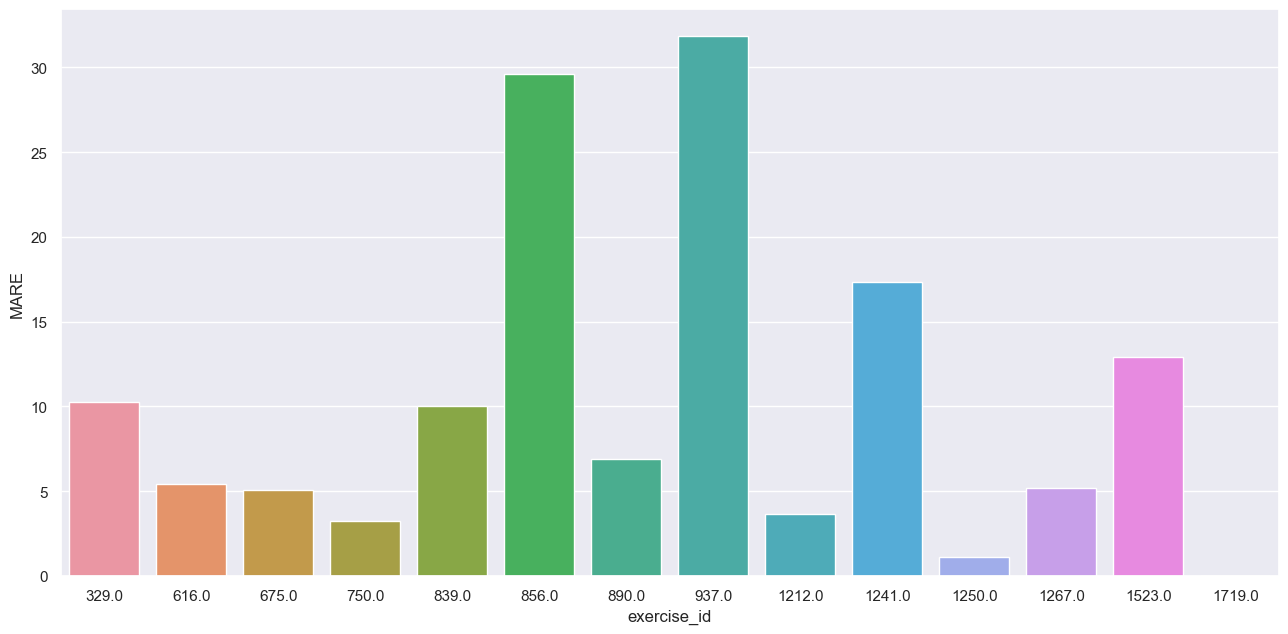

In [76]:
plt.figure(figsize=(14, 7))
sns.barplot(x = 'exercise_id',y = 'MARE', data = df )
plt.show()

# Histogram - hydra_v6c_python_sim_incomplete

<Axes: xlabel='exercise_id', ylabel='MARE'>

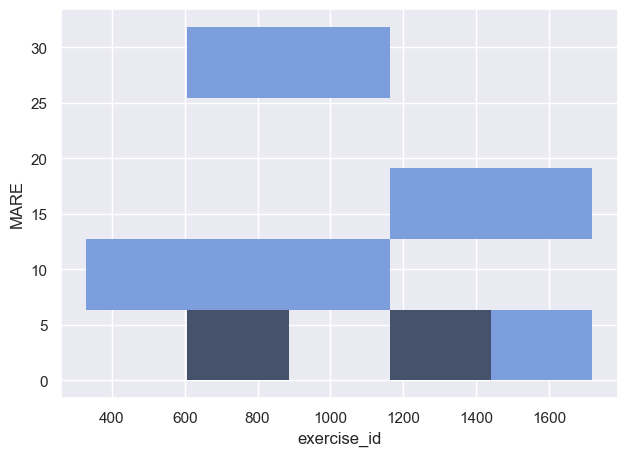

In [77]:
sns.histplot(data = df, x="exercise_id", y="MARE", multiple="stack")

# Joint plot - hydra_v6c_python_sim_incomplete

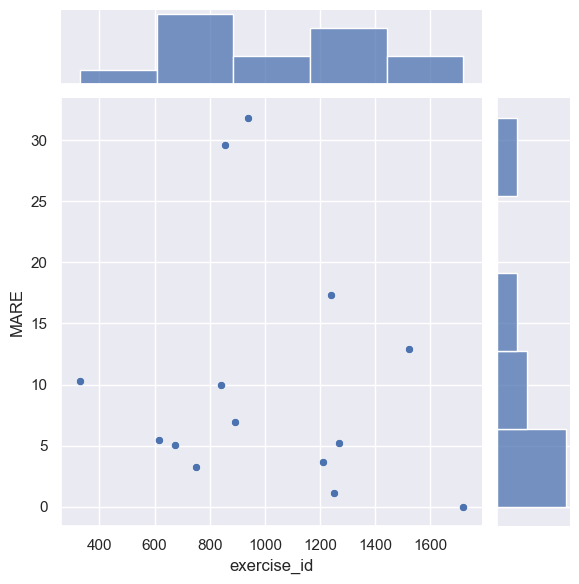

In [78]:
sns.jointplot(data = df, x="exercise_id", y="MARE")

# Scatter plot - hydra_v6c_python_sim_incomplete

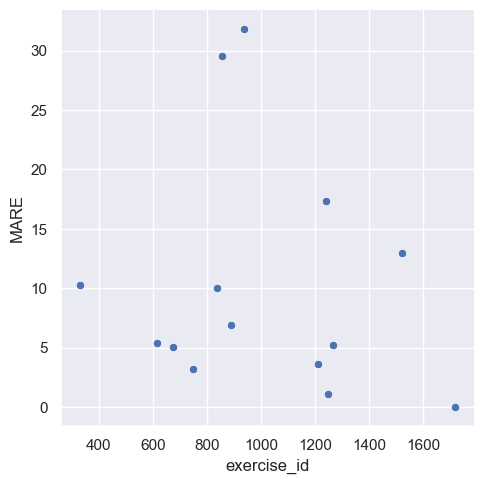

In [79]:
# Apply the default theme
sns.set_theme()
# Create a visualization
sns.relplot(
    data = df,
    x="exercise_id", y="MARE")
plt.show()

# 5. deepmove_v2_v10dataset

In [97]:
df = pd.read_csv('deepmove_v2_v10dataset.csv')

In [98]:
df1 = df.loc[(df['exercise_id'] == 616)
                              | (df['exercise_id'] == 1267)
                              | (df['exercise_id'] == 839)
                              | (df['exercise_id'] == 329)
                              | (df['exercise_id'] == 1212)
                              | (df['exercise_id'] == 675)
                              | (df['exercise_id'] == 1241)
                              | (df['exercise_id'] == 1250)
                              | (df['exercise_id'] == 695)
                              | (df['exercise_id'] == 856)
                              | (df['exercise_id'] == 890)
                              | (df['exercise_id'] == 1523)
                              | (df['exercise_id'] == 1719)
                              | (df['exercise_id'] == 750)
                              | (df['exercise_id'] == 937)
                              | (df['exercise_id'] == 1482)]

In [99]:
df1.head(5)

,Unnamed: 0,variation,release_group,exercise_id,n_sets,MARE,OBZ,OB1,EC,rep_error_bias,is_FA,n_total_reps,signal_score,n_sets delta w/ hydra_v6_v10dataset,is_FA delta w/ hydra_v6_v10dataset,Notes,MARE Vs Hydra V6
15,15,bent over row standing both arms,MVP,616.0,13.0,5.42%,69.23%,84.62%,1.0,0.153846,99.57%,116,92.96%,-1.00,-0.18%,NaN,4.30%
41,41,bodyweight squat hands at shoulders,MVP,329.0,20.0,10.28%,80.00%,90.00%,0.0,0.750000,96.40%,200,96.51%,0.00,-1.04%,NaN,7.83%
176,176,lateral lunge arms by side dumbbell,MVP,750.0,14.0,5.05%,57.14%,92.86%,1.0,0.071429,93.45%,134,96.71%,1.00,-1.89%,NaN,-2.42%
201,201,neutral grip chest press hook lying both arms,MVP,1212.0,6.0,3.24%,66.67%,100.00%,1.0,0.333333,100.00%,67,92.59%,-1.00,0.15%,NaN,-6.83%
224,224,overhead press standing both arms,MVP,839.0,10.0,3.64%,70.00%,90.00%,1.0,0.400000,97.38%,111,98.73%,0.00,0.21%,NaN,2.06%


In [100]:
df1 = df1.drop(columns=['release_group', 'n_sets', 'OBZ', 'OB1', 'EC', 'rep_error_bias', 'n_total_reps', 'n_sets delta w/ hydra_v6_v10dataset', 'is_FA delta w/ hydra_v6_v10dataset', 'Notes', 'MARE Vs Hydra V6'])

In [101]:
df1

,Unnamed: 0,variation,exercise_id,MARE,is_FA,signal_score
15,15,bent over row standing both arms,616.0,5.42%,99.57%,92.96%
41,41,bodyweight squat hands at shoulders,329.0,10.28%,96.40%,96.51%
176,176,lateral lunge arms by side dumbbell,750.0,5.05%,93.45%,96.71%
201,201,neutral grip chest press hook lying both arms,1212.0,3.24%,100.00%,92.59%
224,224,overhead press standing both arms,839.0,3.64%,97.38%,98.73%
240,240,push press standing both arms,1241.0,10.00%,99.09%,96.13%
243,243,pushup on toes,856.0,17.32%,82.67%,89.62%
246,246,renegade row alternating arms on knees,1482.0,29.58%,100.00%,15.40%
251,251,reverse fly standing bent over both arms,1250.0,1.11%,98.95%,93.81%
255,255,reverse lunge arms by side dumbbell,890.0,6.89%,97.98%,95.00%


In [102]:
df1.dtypes

Unnamed: 0       object
variation        object
exercise_id     float64
MARE             object
is_FA            object
signal_score     object
dtype: object

In [87]:
data = {
    'variation': ['bent over row standing both arms', 'bodyweight squat hands at shoulders', 'deadlift romanian', 'lateral lunge arms by side dumbbell', 'neutral grip chest press hook lying both arms', 'overhead press standing both arms', 'push press standing both arms', 'pushup on toes', 'reverse fly standing bent over both arms', 'reverse lunge arms by side dumbbell', 'split squat arms by side', 'tricep kickback standing both arms', 'wide grip bent over row both arms', 'wide grip chest press hook lying both arms'],
    'exercise_id': [616.0, 329.0, 675.0, 750.0, 1212.0, 839.0, 1241.0, 856.0, 1250.0, 890.0, 937.0, 1267.0, 1719.0, 1523.0 ],
           'MARE': [5.42, 10.28, 5.05, 3.24, 3.64, 10.00, 17.32, 29.58, 1.11, 6.89, 31.84, 5.19, 0.00, 12.94],
   'is_FA' : [99.57, 96.40, 93.45, 100.00, 97.38, 99.09, 82.67, 100.00, 98.95, 97.98, 98.68, 99.28, 100.00, 99.18],
    'signal_score': [92.96, 96.51, 96.71, 92.59, 98.73, 96.13, 89.62, 15.40, 93.81, 95.00, 78.98, 74.89, 96.26, 70.05],
}

df = pd.DataFrame(data)

# Barplot - deepmove_v2_v10dataset

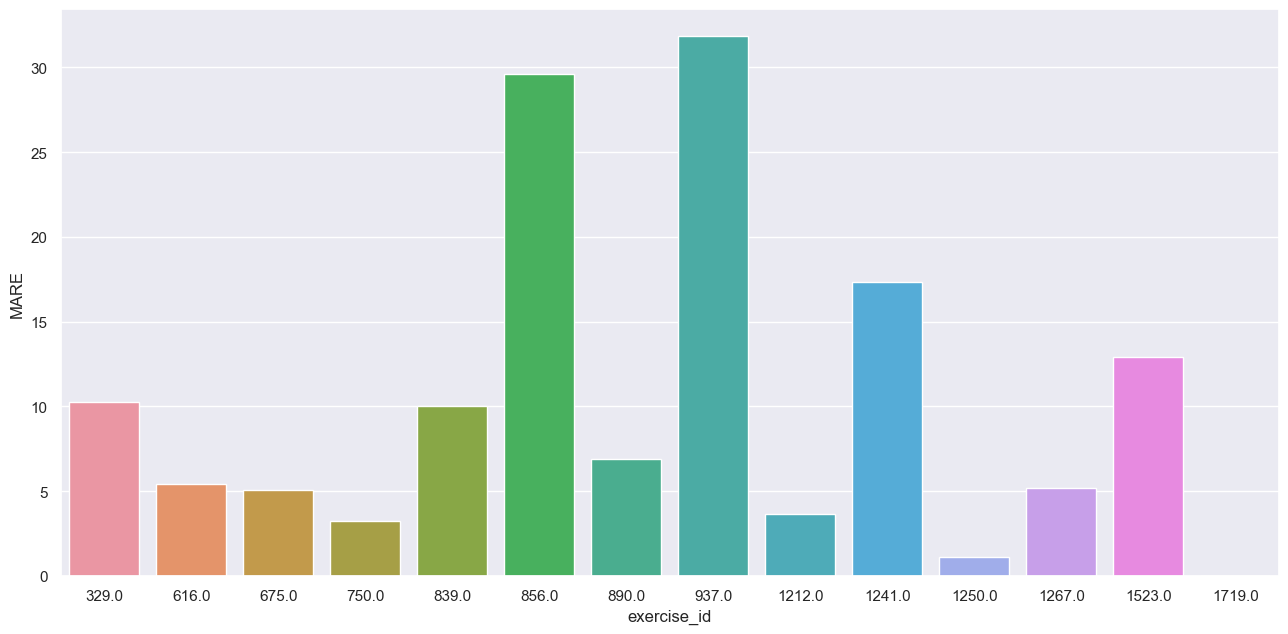

In [88]:
plt.figure(figsize=(14, 7))
sns.barplot(x = 'exercise_id',y = 'MARE', data = df )
plt.show()

# Histogram - deepmove_v2_v10dataset

<Axes: xlabel='exercise_id', ylabel='MARE'>

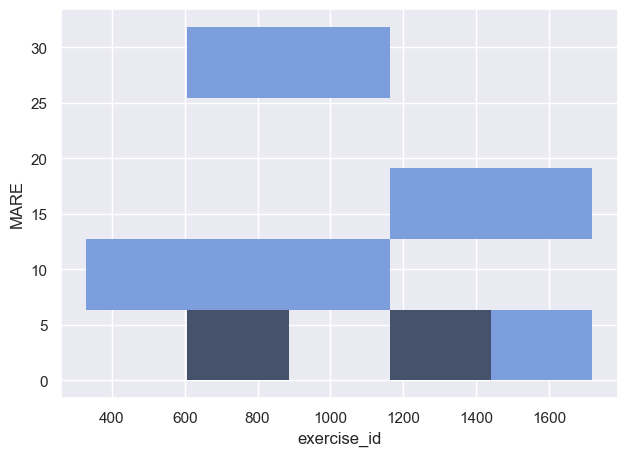

In [89]:
sns.histplot(data = df, x="exercise_id", y="MARE", multiple="stack")

# Joint plot - deepmove_v2_v10dataset

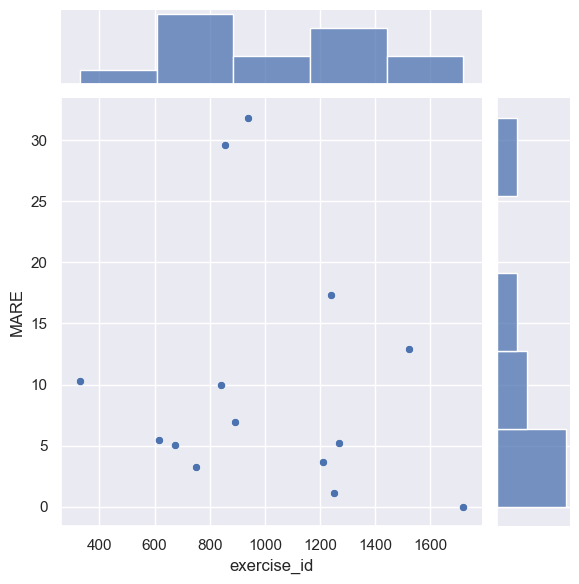

In [90]:
sns.jointplot(data = df, x="exercise_id", y="MARE")

# Scatter plot - deepmove_v2_v10dataset

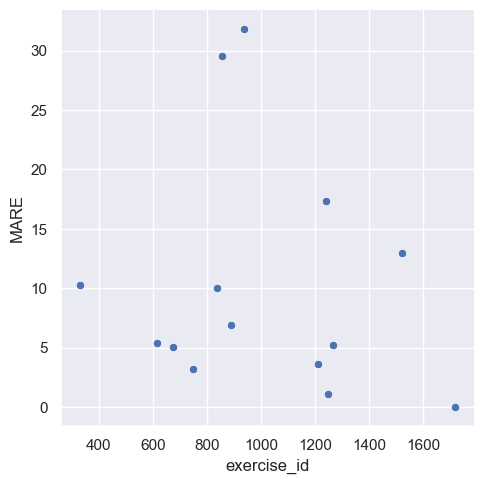

In [91]:
# Apply the default theme
sns.set_theme()
# Create a visualization
sns.relplot(
    data = df,
    x="exercise_id", y="MARE")
plt.show()

# 6. hydra_v6c_v9dataset

In [127]:
df = pd.read_csv('hydra_v6c_v9dataset.csv')
df

,Unnamed: 0,variation,release_group,exercise_id,n_sets,MARE,OBZ,OB1,EC,rep_error_bias,is_FA,n_total_reps,signal_score,MARE delta w/ hydra_v6_FAstridefix,n_sets delta w/ hydra_v6_FAstridefix,is_FA delta w/ hydra_v6_FAstridefix,signal_score delta w/ hydra_v6_FAstridefix
0,0,alternating lunge jumps with both arms swinging,List A,613.0,17.00,6.54%,58.82%,88.24%,1.00,0.000000,98.22%,181.0,90.30%,-0.49%,0.0,0.07%,-0.47%
1,1,alternating lunge jumps with runner arms,List A,612.0,15.00,14.13%,26.67%,66.67%,0.00,-0.333333,97.38%,204.0,92.44%,1.94%,0.0,0.00%,0.28%
2,2,bent over row kneeling alternating with restin...,MVP,620.0,6.00,18.47%,33.33%,33.33%,0.00,-1.333333,98.64%,95.0,63.90%,0.69%,0.0,1.13%,-1.34%
3,3,bent over row kneeling both arms,MVP,618.0,7.00,3.72%,57.14%,100.00%,1.00,0.142857,100.00%,86.0,90.82%,1.43%,0.0,0.08%,-2.45%
4,4,bent over row standing alternating with restin...,MVP,614.0,8.00,10.99%,25.00%,75.00%,0.00,-1.375000,99.63%,108.0,68.25%,1.99%,0.0,0.17%,1.13%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,MVP,Average,NaN,NaN,11.55,5.04%,70.16%,90.41%,0.86,-0.090000,96.97%,NaN,88.34%,-0.01%,NaN,0.82%,0.67%
263,NaN,Sum,182,NaN,2102.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-58.0,NaN,NaN
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,List A,Average,NaN,NaN,12.04,16.45%,51.20%,73.44%,0.49,0.230000,97.64%,NaN,77.44%,-0.24%,NaN,1.60%,3.21%


In [128]:
df1 = df.loc[(df['exercise_id'] == 616)
                              | (df['exercise_id'] == 1267)
                              | (df['exercise_id'] == 839)
                              | (df['exercise_id'] == 329)
                              | (df['exercise_id'] == 1212)
                              | (df['exercise_id'] == 675)
                              | (df['exercise_id'] == 1241)
                              | (df['exercise_id'] == 1250)
                              | (df['exercise_id'] == 695)
                              | (df['exercise_id'] == 856)
                              | (df['exercise_id'] == 890)
                              | (df['exercise_id'] == 1523)
                              | (df['exercise_id'] == 1719)
                              | (df['exercise_id'] == 750)
                              | (df['exercise_id'] == 937)
                              | (df['exercise_id'] == 1482)]

In [129]:
df1

,Unnamed: 0,variation,release_group,exercise_id,n_sets,MARE,OBZ,OB1,EC,rep_error_bias,is_FA,n_total_reps,signal_score,MARE delta w/ hydra_v6_FAstridefix,n_sets delta w/ hydra_v6_FAstridefix,is_FA delta w/ hydra_v6_FAstridefix,signal_score delta w/ hydra_v6_FAstridefix
6,6,bent over row standing both arms,MVP,616.0,9.0,0.00%,100.00%,100.00%,1.0,0.000000,99.87%,90.0,90.80%,-1.11%,0.0,0.16%,-0.10%
26,26,bodyweight squat hands at shoulders,MVP,329.0,18.0,1.47%,88.89%,94.44%,1.0,-0.055556,98.84%,191.0,96.53%,-0.98%,-1.0,2.58%,-0.01%
56,56,deadlift romanian,MVP,675.0,10.0,0.00%,100.00%,100.00%,1.0,0.000000,90.97%,98.0,98.43%,-1.68%,0.0,0.78%,-0.18%
102,102,lateral lunge arms by side dumbbell,MVP,750.0,9.0,5.80%,55.56%,88.89%,1.0,-0.333333,90.97%,84.0,97.28%,-1.67%,-2.0,2.15%,-0.03%
121,121,neutral grip chest press hook lying both arms,MVP,1212.0,17.0,5.59%,82.35%,94.12%,1.0,-0.470588,99.91%,191.0,85.72%,-4.49%,-2.0,1.96%,0.26%
139,139,overhead press standing both arms,MVP,839.0,19.0,1.11%,89.47%,100.00%,1.0,0.000000,95.72%,179.0,91.18%,-0.47%,0.0,2.04%,-2.04%
153,153,push press standing both arms,List A,1241.0,16.0,4.44%,68.75%,87.50%,1.0,-0.125000,98.16%,158.0,96.99%,-56.29%,-4.0,62.12%,23.52%
156,156,pushup on toes,MVP,856.0,13.0,8.71%,84.62%,84.62%,1.0,-0.538462,90.03%,121.0,93.26%,-2.03%,0.0,2.58%,7.35%
160,160,reverse fly standing bent over both arms,MVP,1250.0,15.0,0.61%,93.33%,100.00%,1.0,-0.066667,99.41%,164.0,92.29%,-1.50%,-2.0,-0.24%,-0.21%
164,164,reverse lunge arms by side dumbbell,MVP,890.0,13.0,3.10%,84.62%,84.62%,1.0,0.307692,98.90%,144.0,86.96%,0.70%,0.0,-0.03%,-0.60%


In [130]:
data = {
    'variation': ['bent over row standing both arms', 'bodyweight squat hands at shoulders', 'deadlift romanian', 'lateral lunge arms by side dumbbell', 'neutral grip chest press hook lying both arms', 'overhead press standing both arms', 'push press standing both arms', 'pushup on toes', 'reverse fly standing bent over both arms', 'reverse lunge arms by side dumbbell', 'split squat arms by side', 'tricep kickback standing both arms', 'wide grip bent over row both arms', 'wide grip chest press hook lying both arms'],
    'exercise_id': [616.0, 329.0, 675.0, 750.0, 1212.0, 839.0, 1241.0, 856.0, 1250.0, 890.0, 937.0, 1267.0, 1719.0, 1523.0 ],
           'MARE': [0.00, 1.47, 0.00, 5.80, 5.59, 1.11, 4.44, 8.71, 0.61, 3.10, 11.11, 7.37, 0.00, 2.08],
   'is_FA' : [99.87, 98.84, 90.97, 90.97, 99.91, 95.72, 98.16, 90.03, 99.41, 98.90, 99.68, 99.67, 100.00, 100.00],
    'signal_score': [90.80, 96.53, 98.43, 97.28, 85.72, 91.18, 96.99, 93.26, 92.29, 86.96, 77.72, 76.28, 95.88, 90.92],
}

df = pd.DataFrame(data)

# Barplot - hydra_v6c_v9dataset

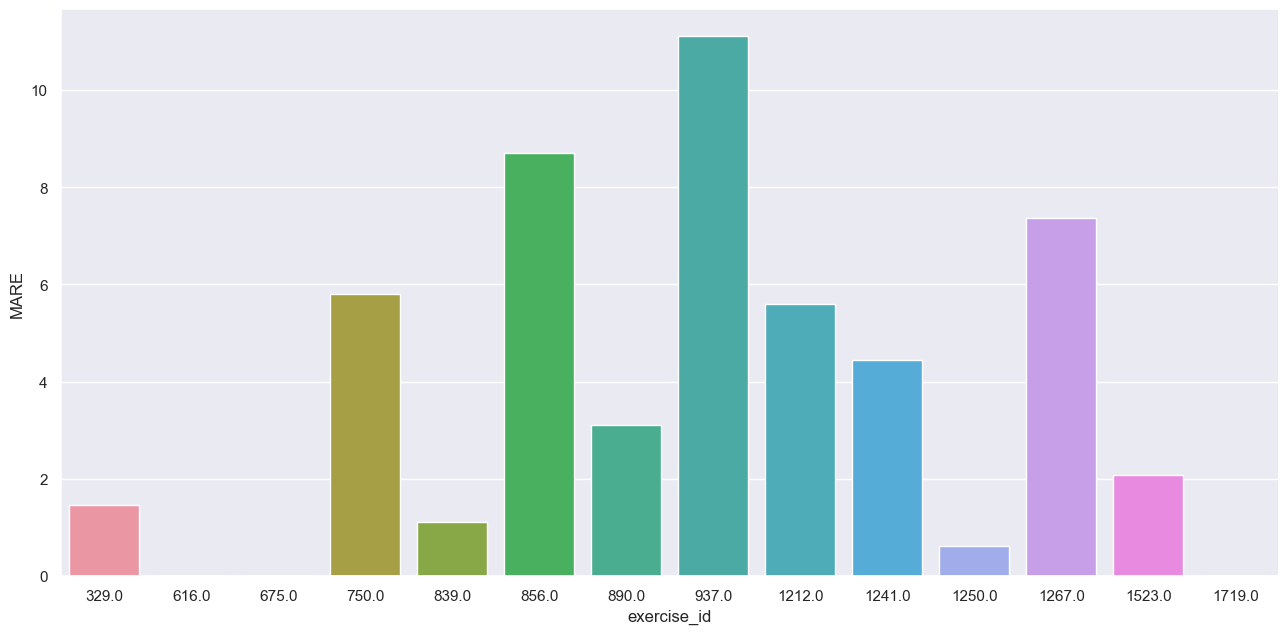

In [131]:
plt.figure(figsize=(14, 7))
sns.barplot(x = 'exercise_id',y = 'MARE', data = df )
plt.show()

# Histogram - hydra_v6c_v9dataset

<Axes: xlabel='exercise_id', ylabel='MARE'>

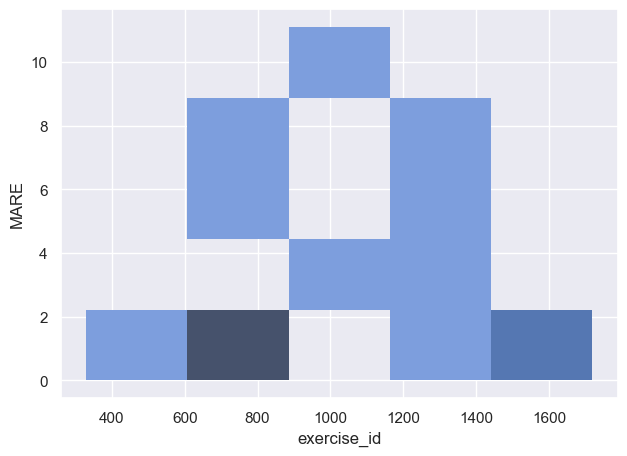

In [132]:
sns.histplot(data = df, x="exercise_id", y="MARE", multiple="stack")

# Joint plot - hydra_v6c_v9dataset

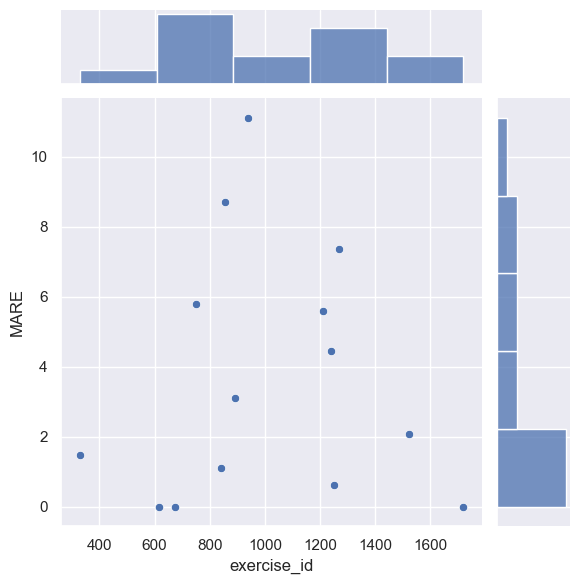

In [133]:
sns.jointplot(data = df, x="exercise_id", y="MARE")

# Scatter plot - hydra_v6c_v9dataset

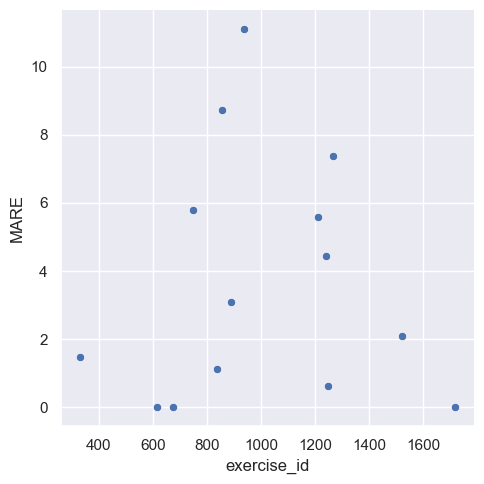

In [134]:
# Apply the default theme
sns.set_theme()
# Create a visualization
sns.relplot(
    data = df,
    x="exercise_id", y="MARE")
plt.show()

# 7. hydra_v7_v9dataset

In [136]:
df = pd.read_csv('hydra_v7_v9dataset.csv')


,Unnamed: 0,variation,release_group,exercise_id,n_sets,MARE,OBZ,OB1,EC,rep_error_bias,is_FA,n_total_reps,signal_score,MARE delta w/ hydra_v6c_v9dataset,n_sets delta w/ hydra_v6c_v9dataset,is_FA delta w/ hydra_v6c_v9dataset,signal_score delta w/ hydra_v6c_v9dataset
0,0,alternating lunge jumps with both arms swinging,List A,613.0,17.00,6.34%,64.71%,88.24%,1.00,-0.235294,98.26%,181.0,87.45%,-0.20%,0.0,0.04%,-2.85%
1,1,alternating lunge jumps with runner arms,List A,612.0,15.00,9.74%,33.33%,73.33%,1.00,-0.200000,97.38%,204.0,82.95%,-4.39%,0.0,0.00%,-9.50%
2,2,bent over row kneeling alternating with restin...,MVP,620.0,6.00,7.76%,50.00%,83.33%,1.00,-0.833333,98.72%,95.0,67.83%,-10.71%,0.0,0.09%,3.93%
3,3,bent over row kneeling both arms,MVP,618.0,7.00,2.29%,71.43%,100.00%,1.00,0.000000,99.92%,86.0,88.12%,-1.43%,0.0,-0.08%,-2.70%
4,4,bent over row standing alternating with restin...,MVP,614.0,8.00,7.46%,62.50%,75.00%,1.00,-1.250000,99.54%,108.0,69.50%,-3.53%,0.0,-0.10%,1.25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,MVP,Average,NaN,NaN,11.81,4.65%,71.87%,90.83%,0.88,-0.080000,97.00%,NaN,88.12%,-0.35%,NaN,0.03%,-0.41%
263,NaN,Sum,181,NaN,2138.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,List A,Average,NaN,NaN,12.42,10.98%,55.40%,78.42%,0.55,-0.220000,97.63%,NaN,76.08%,-1.38%,NaN,-0.01%,-0.66%


In [137]:
df1 = df.loc[(df['exercise_id'] == 616)
                              | (df['exercise_id'] == 1267)
                              | (df['exercise_id'] == 839)
                              | (df['exercise_id'] == 329)
                              | (df['exercise_id'] == 1212)
                              | (df['exercise_id'] == 675)
                              | (df['exercise_id'] == 1241)
                              | (df['exercise_id'] == 1250)
                              | (df['exercise_id'] == 695)
                              | (df['exercise_id'] == 856)
                              | (df['exercise_id'] == 890)
                              | (df['exercise_id'] == 1523)
                              | (df['exercise_id'] == 1719)
                              | (df['exercise_id'] == 750)
                              | (df['exercise_id'] == 937)
                              | (df['exercise_id'] == 1482)]

In [139]:
data = {
    'variation': ['bent over row standing both arms', 'bodyweight squat hands at shoulders', 'deadlift romanian', 'lateral lunge arms by side dumbbell', 'neutral grip chest press hook lying both arms', 'overhead press standing both arms', 'push press standing both arms', 'pushup on toes', 'reverse fly standing bent over both arms', 'reverse lunge arms by side dumbbell', 'split squat arms by side', 'tricep kickback standing both arms', 'wide grip bent over row both arms', 'wide grip chest press hook lying both arms'],
    'exercise_id': [616.0, 329.0, 675.0, 750.0, 1212.0, 839.0, 1241.0, 856.0, 1250.0, 890.0, 937.0, 1267.0, 1719.0, 1523.0 ],
    'MARE': [0.00, 1.92, 0.00, 4.75, 6.38, 2.22, 3.05, 8.35, 1.67, 4.65, 2.02, 2.64, 0.00, 2.08],
    'is_FA' : [99.87, 99.03, 91.40, 91.15, 99.83, 96.23, 96.89, 88.89, 99.56, 98.86, 99.65, 99.90, 100.00, 99.91],
    'signal_score': [91.24, 96.55, 98.04, 96.71, 81.92, 91.90, 95.90, 84.67, 91.17, 85.68, 71.43, 83.11, 97.58, 86.04],
}

df = pd.DataFrame(data)

# Barplot - hydra_v7_v9dataset

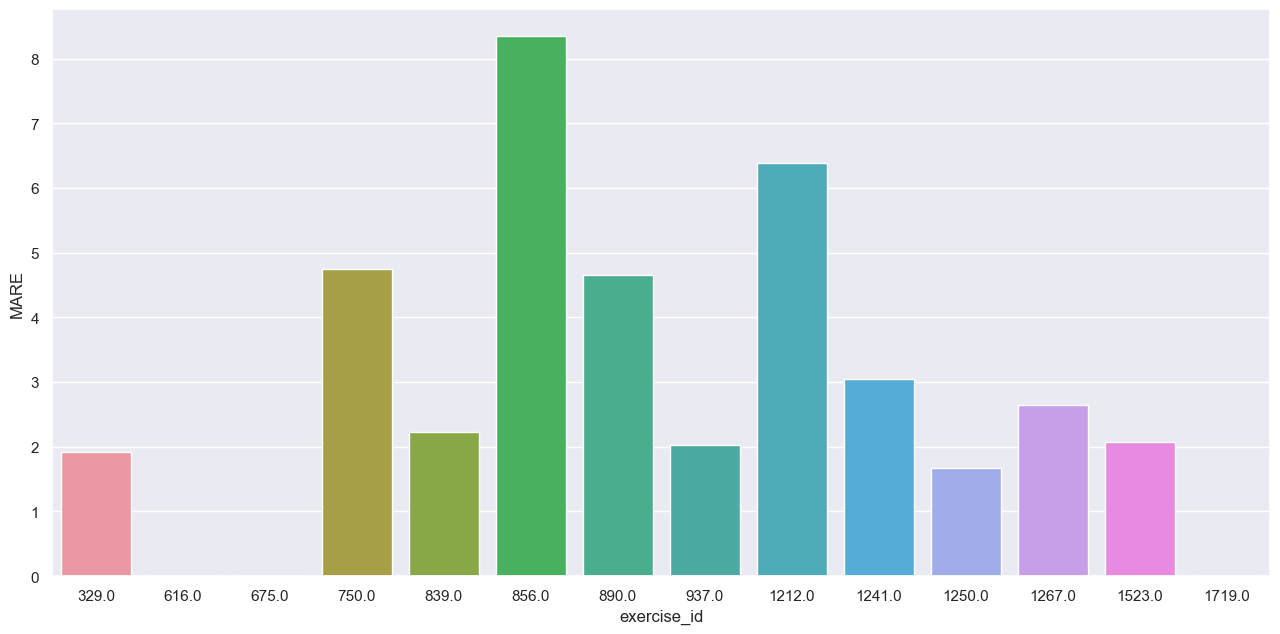

In [140]:
plt.figure(figsize=(14, 7))
sns.barplot(x = 'exercise_id',y = 'MARE', data = df )
plt.show()

# Histogram - hydra_v7_v9dataset

<Axes: xlabel='exercise_id', ylabel='MARE'>

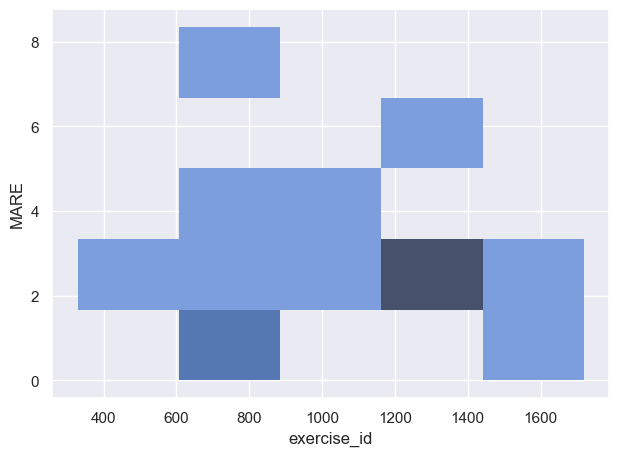

In [141]:
sns.histplot(data = df, x="exercise_id", y="MARE", multiple="stack")

# Joint plot - hydra_v7_v9dataset

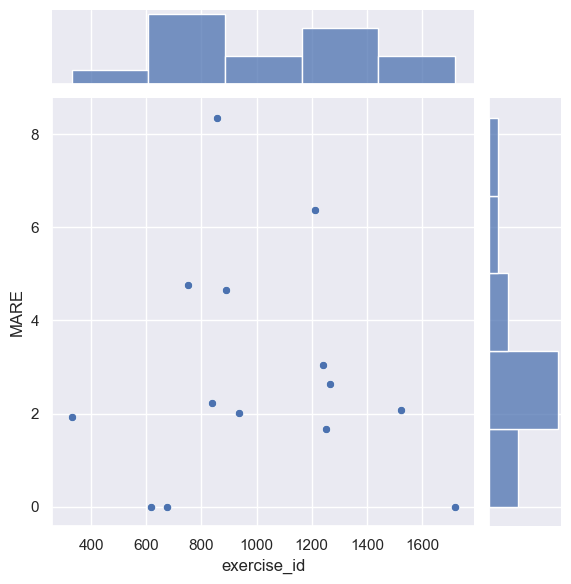

In [142]:
sns.jointplot(data = df, x="exercise_id", y="MARE")

# Scatter plot - hydra_v7_v9dataset

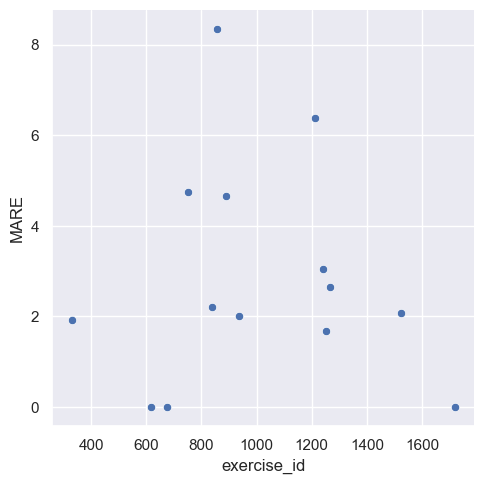

In [143]:
# Apply the default theme
sns.set_theme()
# Create a visualization
sns.relplot(
    data = df,
    x="exercise_id", y="MARE")
plt.show()

# 8. yoga_free_v9dataset-new_pipeline

In [144]:
df = pd.read_csv('yoga_free_v9dataset-new_pipeline.csv')

In [146]:
df1 = df.loc[(df['exercise_id'] == 616)
                              | (df['exercise_id'] == 1267)
                              | (df['exercise_id'] == 839)
                              | (df['exercise_id'] == 329)
                              | (df['exercise_id'] == 1212)
                              | (df['exercise_id'] == 675)
                              | (df['exercise_id'] == 1241)
                              | (df['exercise_id'] == 1250)
                              | (df['exercise_id'] == 695)
                              | (df['exercise_id'] == 856)
                              | (df['exercise_id'] == 890)
                              | (df['exercise_id'] == 1523)
                              | (df['exercise_id'] == 1719)
                              | (df['exercise_id'] == 750)
                              | (df['exercise_id'] == 937)
                              | (df['exercise_id'] == 1482)]

In [147]:
df1

,Unnamed: 0,variation,release_group,exercise_id,n_sets,MARE,OBZ,OB1,EC,rep_error_bias,is_FA,n_total_reps,signal_score,FA Delta With V7,MARE Delta With V7,Clip Delta
6,6.0,bent over row standing both arms,MVP,616.0,9.0,1.85%,88.89%,88.89%,1.0,0.222222,99.25%,90.0,92.17%,-0.62%,1.85%,0.0
26,26.0,bodyweight squat hands at shoulders,MVP,329.0,19.0,1.68%,84.21%,94.74%,1.0,-0.105263,98.51%,201.0,72.47%,-0.52%,-0.24%,0.0
56,56.0,deadlift romanian,MVP,675.0,10.0,3.22%,80.00%,90.00%,1.0,0.400000,94.31%,98.0,91.12%,2.90%,3.22%,0.0
101,101.0,lateral lunge arms by side dumbbell,MVP,750.0,11.0,9.14%,54.55%,81.82%,1.0,-0.727273,89.89%,104.0,93.72%,-1.26%,4.39%,0.0
120,120.0,neutral grip chest press hook lying both arms,MVP,1212.0,19.0,13.31%,68.42%,78.95%,0.0,-0.368421,93.34%,202.0,75.32%,-6.48%,6.93%,0.0
138,138.0,overhead press standing both arms,MVP,839.0,19.0,1.64%,84.21%,100.00%,1.0,0.052632,96.79%,179.0,92.60%,0.56%,-0.58%,0.0
151,151.0,push press standing both arms,List A,1241.0,20.0,14.72%,60.00%,70.00%,0.0,-0.500000,84.44%,185.0,93.35%,-12.44%,11.67%,0.0
154,154.0,pushup on toes,MVP,856.0,11.0,4.80%,63.64%,81.82%,1.0,0.272727,94.29%,100.0,79.96%,5.40%,-3.55%,-2.0
158,158.0,reverse fly standing bent over both arms,MVP,1250.0,18.0,12.02%,61.11%,77.78%,0.0,0.888889,99.57%,194.0,72.37%,0.02%,10.35%,0.0
162,162.0,reverse lunge arms by side dumbbell,MVP,890.0,13.0,2.65%,76.92%,92.31%,1.0,0.230769,96.76%,144.0,81.98%,-2.10%,-2.01%,0.0


In [148]:
data = {
    'variation': ['bent over row standing both arms', 'bodyweight squat hands at shoulders', 'deadlift romanian', 'lateral lunge arms by side dumbbell', 'neutral grip chest press hook lying both arms', 'overhead press standing both arms', 'push press standing both arms', 'pushup on toes', 'reverse fly standing bent over both arms', 'reverse lunge arms by side dumbbell', 'split squat arms by side', 'tricep kickback standing both arms', 'wide grip bent over row both arms', 'wide grip chest press hook lying both arms'],
    'exercise_id': [616.0, 329.0, 675.0, 750.0, 1212.0, 839.0, 1241.0, 856.0, 1250.0, 890.0, 937.0, 1267.0, 1719.0, 1523.0 ],
    'MARE': [1.85, 1.68, 3.22, 9.14, 13.31, 1.64, 14.72, 4.80, 12.02, 2.65, 1.01, 6.51, 0.00, 4.01],
    'is_FA' : [99.25, 98.51, 94.31, 89.89, 93.34, 96.79, 84.44, 94.29, 99.57, 96.76, 98.68, 99.60, 99.94, 99.55],
    'signal_score': [92.17, 72.47, 91.12, 93.72, 75.32, 92.60, 93.35, 79.96, 72.37, 81.98, 46.09, 72.35, 96.25, 83.52],
}

df = pd.DataFrame(data)

# Barplot - yoga_free_v9dataset-new_pipeline

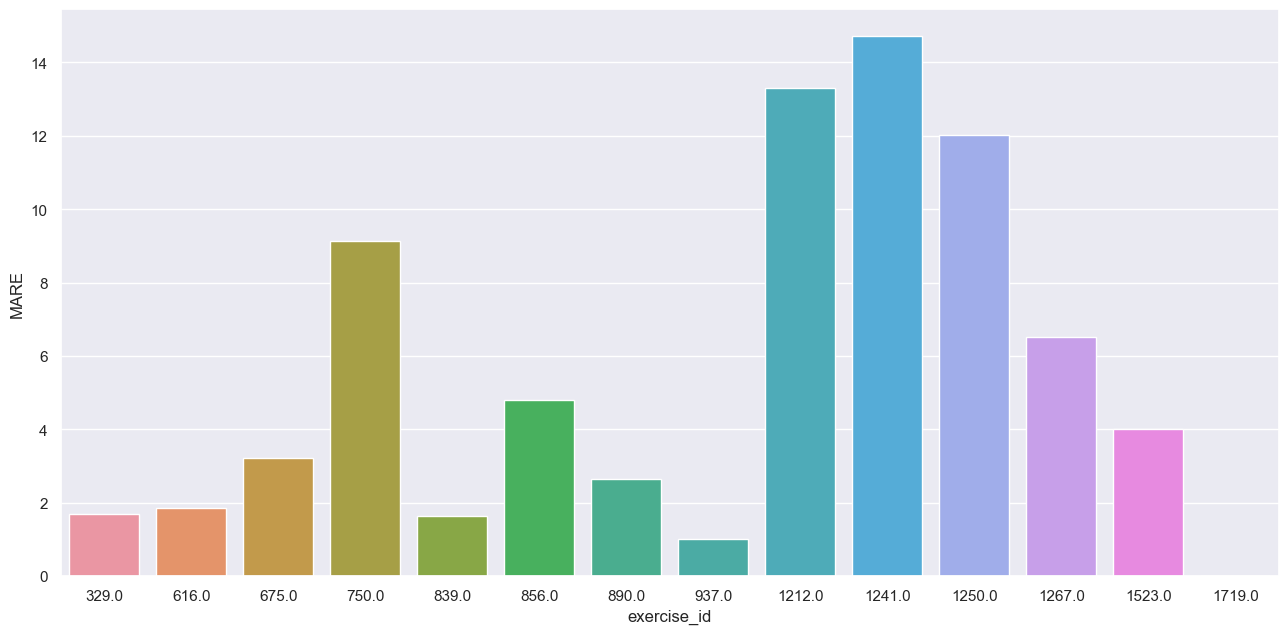

In [149]:
plt.figure(figsize=(14, 7))
sns.barplot(x = 'exercise_id',y = 'MARE', data = df )
plt.show()

# Histogram - yoga_free_v9dataset-new_pipeline

<Axes: xlabel='exercise_id', ylabel='MARE'>

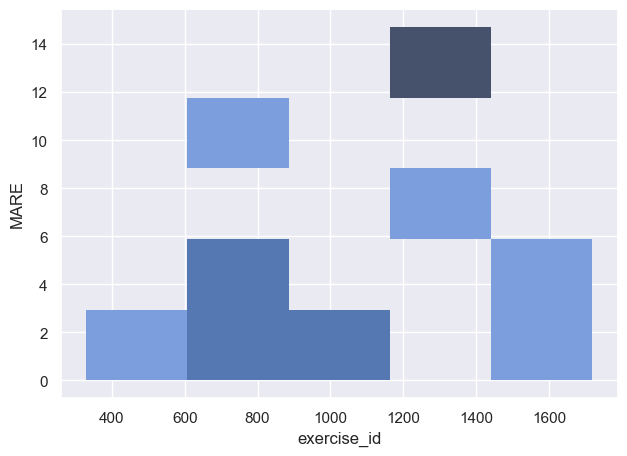

In [150]:
sns.histplot(data = df, x="exercise_id", y="MARE", multiple="stack")

# Joint plot - yoga_free_v9dataset-new_pipeline

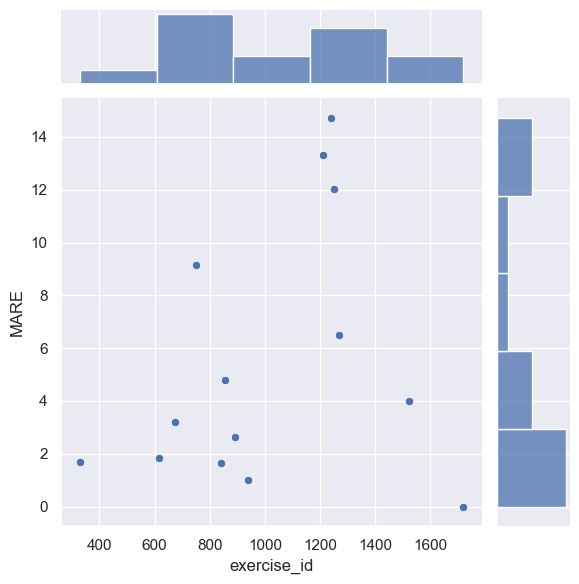

In [151]:
sns.jointplot(data = df, x="exercise_id", y="MARE")

# Scatter plot - yoga_free_v9dataset-new_pipeline

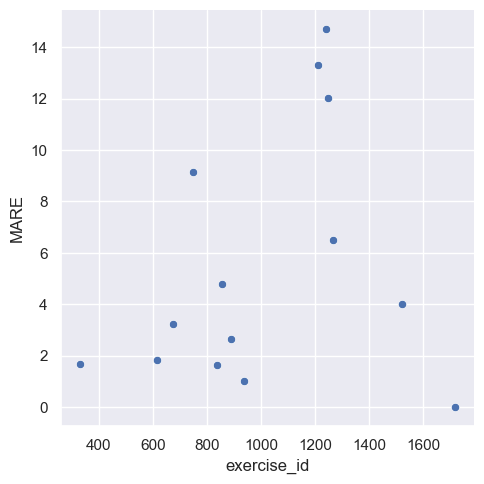

In [152]:
# Apply the default theme
sns.set_theme()
# Create a visualization
sns.relplot(
    data = df,
    x="exercise_id", y="MARE")
plt.show()

# 9. yoga_free_v9dataset-old_pipeline

In [153]:
df = pd.read_csv('yoga_free_v9dataset-old_pipeline.csv')

In [155]:
df1 = df.loc[(df['exercise_id'] == 616)
                              | (df['exercise_id'] == 1267)
                              | (df['exercise_id'] == 839)
                              | (df['exercise_id'] == 329)
                              | (df['exercise_id'] == 1212)
                              | (df['exercise_id'] == 675)
                              | (df['exercise_id'] == 1241)
                              | (df['exercise_id'] == 1250)
                              | (df['exercise_id'] == 695)
                              | (df['exercise_id'] == 856)
                              | (df['exercise_id'] == 890)
                              | (df['exercise_id'] == 1523)
                              | (df['exercise_id'] == 1719)
                              | (df['exercise_id'] == 750)
                              | (df['exercise_id'] == 937)
                              | (df['exercise_id'] == 1482)]

In [156]:
df1

,Unnamed: 0,variation,release_group,exercise_id,n_sets,MARE,OBZ,OB1,EC,rep_error_bias,is_FA,n_total_reps,signal_score,FA Delta With V7,MARE Delta With V7,n_sets delta w/ hydra_v7,FA Delta With New Pipeline,MARE Delta With New Pipeline
6,6.0,bent over row standing both arms,MVP,616.0,9.0,2.35%,77.78%,100.00%,1.0,-0.222222,99.92%,90.0,95.80%,0.05%,2.35%,0.00,0.67%,0.50%
26,26.0,bodyweight squat hands at shoulders,MVP,329.0,19.0,1.92%,84.21%,94.74%,1.0,0.000000,99.54%,201.0,96.46%,0.51%,0.00%,0.00,1.03%,0.24%
56,56.0,deadlift romanian,MVP,675.0,9.0,1.71%,88.89%,88.89%,1.0,0.222222,95.37%,87.0,98.16%,3.97%,1.71%,-1.00,1.06%,-1.51%
101,101.0,lateral lunge arms by side dumbbell,MVP,750.0,11.0,4.60%,63.64%,90.91%,1.0,-0.090909,93.83%,104.0,96.37%,2.68%,-0.15%,0.00,3.94%,-4.54%
120,120.0,neutral grip chest press hook lying both arms,MVP,1212.0,19.0,10.99%,73.68%,89.47%,0.0,-0.736842,94.69%,202.0,78.80%,-5.14%,4.61%,0.00,1.35%,-2.32%
138,138.0,overhead press standing both arms,MVP,839.0,19.0,1.05%,89.47%,100.00%,1.0,0.000000,96.15%,179.0,90.50%,-0.08%,-1.17%,0.00,-0.64%,-0.59%
151,151.0,push press standing both arms,List A,1241.0,20.0,4.33%,80.00%,85.00%,1.0,-0.100000,96.47%,185.0,96.21%,-0.41%,1.28%,0.00,12.03%,-10.39%
154,154.0,pushup on toes,MVP,856.0,11.0,9.64%,81.82%,81.82%,1.0,-0.727273,92.36%,100.0,85.31%,3.47%,1.29%,-2.00,-1.93%,4.84%
158,158.0,reverse fly standing bent over both arms,MVP,1250.0,18.0,1.67%,88.89%,94.44%,1.0,-0.055556,99.61%,194.0,89.54%,0.05%,0.00%,0.00,0.04%,-10.35%
162,162.0,reverse lunge arms by side dumbbell,MVP,890.0,13.0,0.90%,92.31%,92.31%,1.0,0.153846,99.24%,144.0,89.65%,0.39%,-3.75%,0.00,2.48%,-1.75%
